# Introduction
We are using  Artificial Recurrent Neural Network which as known as Long Short Term Memory (LSTM) to predict the closing stock price of a corporation using the previous 60 day stock price.

## Importing libraries

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Getting the Stock Price

In [2]:
df = web.DataReader('AMZN', data_source='yahoo', start='2010-01-01',end='2020-12-10')

In [3]:
# weekly frequency / closing prices
# df1 = df.asfreq('W-FRI', method='pad')

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
2010-01-08,133.679993,129.029999,130.559998,133.520004,9830500,133.520004


In [5]:
print(f"Dataframe has {df.shape[0]} rows and, {df.shape[1]} columns.")

Dataframe has 2755 rows and, 6 columns.


## Visualisation

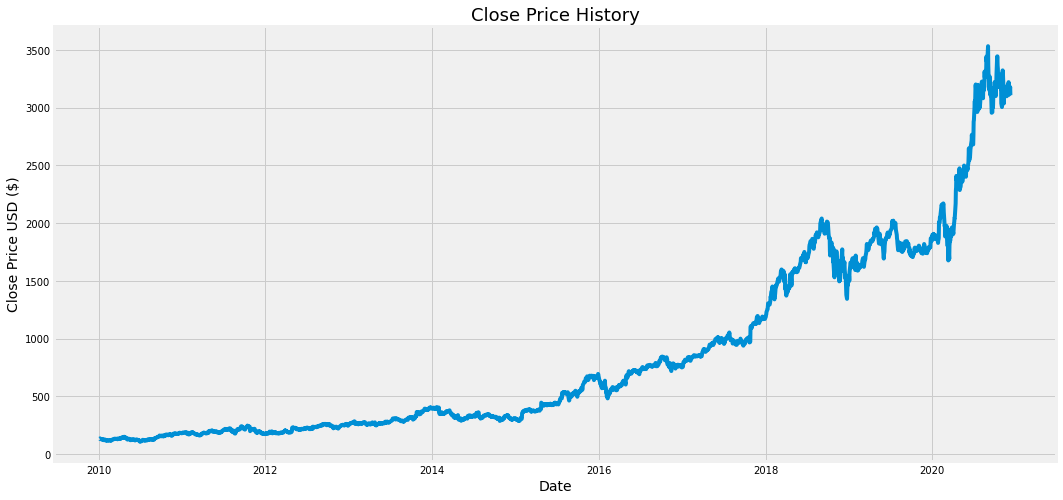

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History',fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize = 14)
plt.show()

In [7]:
# Close price dataframe
df_close = df.filter(['Close'])

# Converting dataframe to a numpy array
data = df_close.values

# Number of rows to train the model on
training_data_len = math.ceil(len(data)*.8)

training_data_len



2204

## Data Pre-processing

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.0073886 ],
       [0.0076194 ],
       [0.00690655],
       ...,
       [0.89653039],
       [0.87517675],
       [0.87438502]])

In [9]:
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]

# Split the data into X_train, y_train datasets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <=61:
    print(x_train)
    print(y_train)
    print()

[array([0.0073886 , 0.0076194 , 0.00690655, 0.0062492 , 0.00727758,
       0.00633976, 0.00547499, 0.00598918, 0.00547499, 0.00541363,
       0.00555095, 0.0050163 , 0.00526171, 0.00374543, 0.00341821,
       0.00317573, 0.00413107, 0.00508934, 0.00490821, 0.00299751,
       0.0027784 , 0.00306471, 0.0021415 , 0.00256512, 0.00240151,
       0.0027521 , 0.00255636, 0.00335394, 0.00322831, 0.00260602,
       0.00224959, 0.00276671, 0.0026031 , 0.00274626, 0.0025213 ,
       0.00324584, 0.00280177, 0.0028602 , 0.00465403, 0.00494326,
       0.00504844, 0.00581973, 0.00593075, 0.00628133, 0.00590446,
       0.00639819, 0.00729511, 0.00678092, 0.00657933, 0.00677215,
       0.00664068, 0.00705554, 0.00635145, 0.00638651, 0.006033  ,
       0.00567657, 0.00763109, 0.0077275 , 0.00774503, 0.00817158])]
[0.00793493241121418]

[array([0.0073886 , 0.0076194 , 0.00690655, 0.0062492 , 0.00727758,
       0.00633976, 0.00547499, 0.00598918, 0.00547499, 0.00541363,
       0.00555095, 0.0050163 , 0.00

In [10]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshape the data to make 3 dim for LSTM model
x_train.shape

(2144, 60)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2144, 60, 1)

## Building Model

In [13]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1),))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
model.fit(x_train, y_train,batch_size = 1, epochs = 1)

2144/2144 [==============================] - 44s 21ms/step - loss: 4.4918e-04


In [16]:
# Create the testing data set
# Create a new array containing scaled values from 1543 to 2003

test_data = scaled_data[training_data_len-60: ,  :]

# Create the datasets x_test and y_test

x_test = []
y_test = data[training_data_len: , : ]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [17]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
# Reshaping the test data for LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
# Predicted prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

## Model Evaluation

In [20]:
# root mean squared error (RMSE)
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

116.17675117597537

In [21]:
train = df[:training_data_len]
valid = df[training_data_len : ]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
2010-01-08,133.679993,129.029999,130.559998,133.520004,9830500,133.520004


In [23]:
valid.head()

,High,Low,Open,Close,Volume,Adj Close,Predictions
Date,,,,,,,
2018-10-04,1956.000000,1896.569946,1949.000000,1909.420044,7257000,1909.420044,1934.553101
2018-10-05,1929.079956,1862.829956,1917.989990,1889.650024,6822300,1889.650024,1932.486816
2018-10-08,1902.000000,1830.660034,1874.000000,1864.420044,7393200,1864.420044,1926.715820
2018-10-09,1896.680054,1852.319946,1859.989990,1870.319946,4772900,1870.319946,1917.416504
2018-10-10,1858.560059,1754.410034,1857.890015,1755.250000,10988900,1755.250000,1906.654175


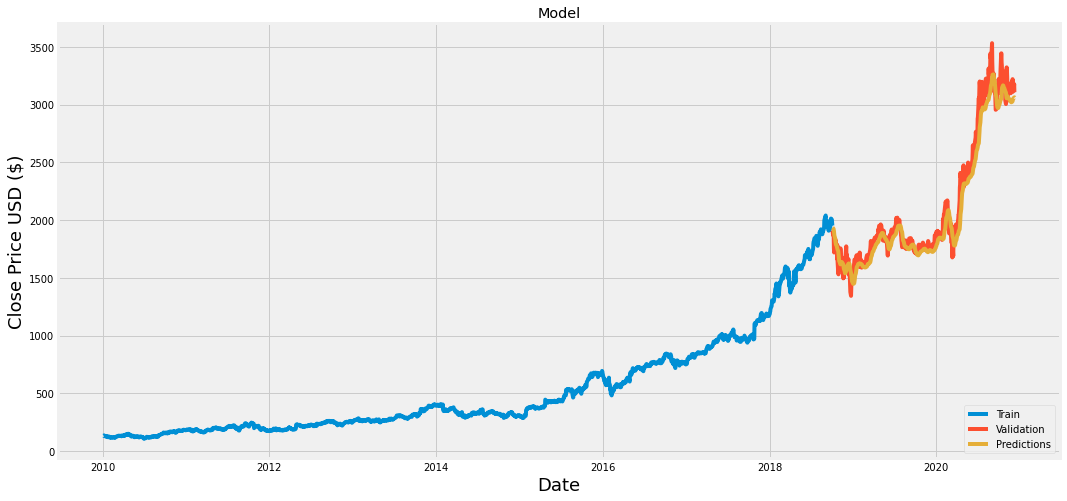

In [24]:
# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc = 'lower right')
plt.show()


In [25]:
valid['error'] = valid['Predictions'] - valid['Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
valid['error'].mean()

-63.99497030434721

In [27]:
# Show the valid, predicted prices and error
valid[['Close','Predictions']]

,Close,Predictions
Date,,
2018-10-04,1909.420044,1934.553101
2018-10-05,1889.650024,1932.486816
2018-10-08,1864.420044,1926.715820
2018-10-09,1870.319946,1917.416504
2018-10-10,1755.250000,1906.654175
...,...,...
2020-12-04,3162.580078,3053.561768
2020-12-07,3158.000000,3058.152588
2020-12-08,3177.290039,3060.716309


# Make a single prediction

## Amazon

In [28]:
# Get the quote
amazon_quote = web.DataReader('AMZN', data_source='yahoo', start='2010-01-01',end='2020-12-09')

# Create a new dataframe
new_df = amazon_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the last 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[3060.5825]]


In [29]:
# Get the quote
amazon_quote2 = web.DataReader('AMZN', data_source='yahoo', start='2020-12-10',end='2020-12-10')
print(amazon_quote2['Close'])

Date
2020-12-10    3101.48999
2020-12-10    3101.48999
Name: Close, dtype: float64


## Facebook

In [30]:
# Get the quote
facebook_quote = web.DataReader('FB', data_source='yahoo', start='2010-01-01',end='2020-12-08')

# Create a new dataframe
fb_df = facebook_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = fb_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the last 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[266.6405]]


In [31]:
# Get the quote
facebook_quote2 = web.DataReader('FB', data_source='yahoo', start='2020-12-09',end='2020-12-09')
print(facebook_quote2['Close'])

Date
2020-12-09    277.920013
Name: Close, dtype: float64


## Pfizer

In [32]:
# Get the quote
pfizer_quote = web.DataReader('PFE', data_source='yahoo', start='2010-01-01',end='2020-12-08')

# Create a new dataframe
pfe_df = pfizer_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = pfe_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the last 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[39.525864]]


In [33]:
# Get the quote
pfizer_quote = web.DataReader('PFE', data_source='yahoo', start='2020-12-09',end='2020-12-09')
print(pfizer_quote['Close'])

Date
2020-12-09    41.849998
Name: Close, dtype: float64


## Apple

In [34]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01',end='2020-12-09')

# Create a new dataframe
apple_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = apple_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the last 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[116.15725]]


In [36]:
# Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-10',end='2020-12-10')
print(apple_quote2['Close'])

Date
2020-12-10    123.239998
2020-12-10    123.239998
Name: Close, dtype: float64
